In [42]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.axis import Axis
from loadData import *

print(os.getcwd())
#nfea --- 特征数，mean -- 均值，dataset -- 数据集，FSName -- 特征选择的名字
maxx = []
marker = ['s','^','o','v','^','*','v','x','p','o']
# linestyle = ['-.','-.','dotted','dotted','dotted','dotted','dotted',':','dashed','dotted']
linestyle = ['-','-','-','-','-','-','-','-','-','-']
markerfacecolor=[None,None,'white',None,'white',None,'white',None,None,None]
color = ['b','goldenrod','gold',None,None,None,None,'cornflowerblue',None,None]
def legend(FSTpye):
    fig,ax = plt.subplots(figsize=(8, 2.1)) 
    l = len(FSTpye)
    for i in range(l-1):
        ax.plot(0, 0 , label=FSTpye[i], markersize='3', marker=marker[i],linestyle=linestyle[i],markerfacecolor=markerfacecolor[i],color=color[i])    
    ax.plot(0, 0 , label=FSTpye[l-1], markersize='3', marker='o',color='black')
    

#     plt.plot(0, 0, markersize='5', marker='o',color='white')
#     ax.set_visible(False)
    ax.set_frame_on(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#     ax.legend(loc = 'lower right')
    ax.legend(loc='center left', bbox_to_anchor=(0, 0.7),ncol=5)
#     ax.legend(loc = 4,framealpha=0.8)
    plt.savefig('./evaldata/legend.pdf')
    plt.show()
def figure2(nfea,mean,dataset,FSName,dataName):
    fig,ax = plt.subplots() 
    x = np.linspace(1, nfea, nfea)
#     print(x)
    l = len(mean)
    for i in range(l-1):
        ax.plot(x, mean[i,:] , label=FSName[i], markersize='3', marker=marker[i],markerfacecolor=markerfacecolor[i],color=color[i])
    ax.plot(x, mean[l-1,:] , label=FSName[l-1], markersize='3', marker='o',color='black')
    
    maxaccIdx=0
    maxacc=0
    for i in range(len(mean[-1])):
        if maxacc<mean[-1][i]:
            maxacc=mean[-1][i]
            maxaccIdx=i+1
    print(dataName+' & '+str(maxaccIdx)+ ' & %.2f'%(maxacc*100))
    maxx.append(maxaccIdx)
    #设置坐标轴
#     my_x_ticks = np.arange(1, 20, 3)
#     plt.xticks(my_x_ticks)
    plt.title(dataName,fontsize=13)
    plt.xlabel('Number of selected features',fontsize=13)
    plt.ylabel('Classification accuracy',fontsize=13)
    
#     ax.legend(loc = 4,framealpha=0.8)
    plt.savefig('./evaldata/'+dataset+'/'+dataset+'_all_acc.pdf')
    plt.show()

import csv
def opencsv(filename):
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        result = list(reader)
    return np.array(result).astype(np.float)
def test(FSTpye,dataset,dataName,Classifier,FSName,ClaIdx):
    claCount = len(Classifier)
    FSCount = len(FSTpye)
    file = './evaldata/'+dataset
    path = '../fuzzy_FS/data/'+dataset+'.arff'
    sample,label,labelCount,meta = loadDataArff(path)
    nfea = sample.shape[1]
    if nfea > 50:
        nfea = 50
    ACC = np.zeros((claCount,FSCount, 10, nfea))
    
    S = np.zeros((FSCount,nfea))
    
    print(dataset)
    for j in range(FSCount):
        idx_file = file+'/' + FSTpye[j] + '/' + 'ACC.bat'
        acc_temp = np.fromfile(file=idx_file, dtype=np.float64)
        claCount = len(Classifier)
        if (len(acc_temp)/10)%claCount != 0:
            claCount = 7
        ACC[0:claCount,j,:,:] = acc_temp.reshape(claCount, 10, nfea)
        
    classAcc = np.zeros((FSCount, 10, nfea))
    for i in ClaIdx:
        classAcc = classAcc + ACC[i,:,:,:]

    mean = np.mean(classAcc,axis=1)/len(ClaIdx) 
    figure2(nfea, mean ,dataset,FSName,dataName)
#     print(S/lcla)

C:\Users\xuhao\Desktop\pyWorkSpace\single_FS


dermatology
Dermatology & 29 & 95.36


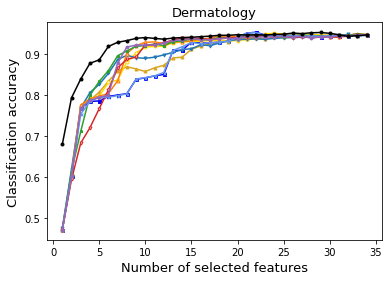

featMIAS
FeatMIAS & 18 & 73.93


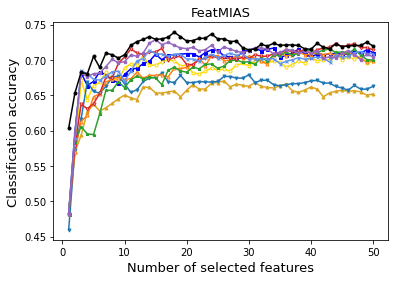

movement_libras
Movement_libras & 27 & 79.10


musk1
Musk1 & 46 & 82.18


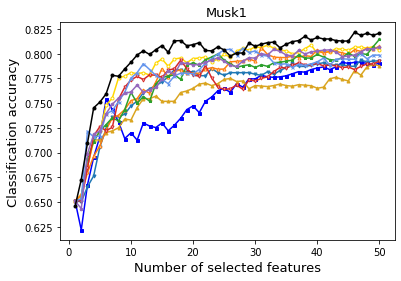

Synthetic_control
Synthetic_control & 41 & 96.46


waveform
Waveform & 22 & 81.85


wdbc
Wdbc & 11 & 95.65


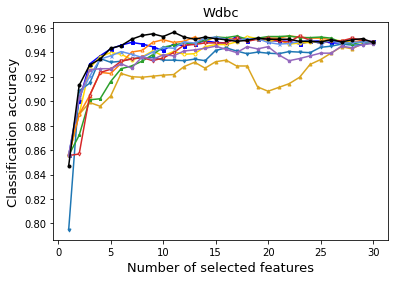

arcene
Arcene & 48 & 84.75


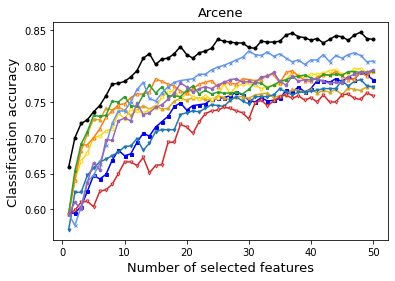

CLL_SUB_111
CLL_SUB_111 & 41 & 77.73


GLIOMA
GLIOMA & 42 & 82.00


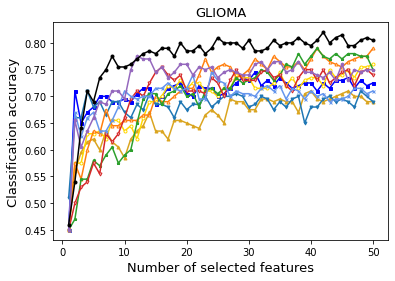

Isolet
Isolet & 49 & 87.68


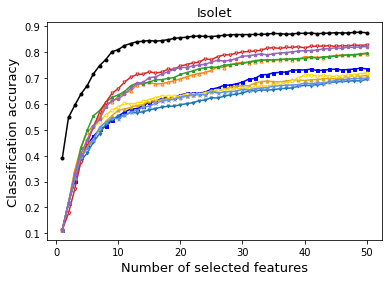

ORL
ORL & 32 & 95.94


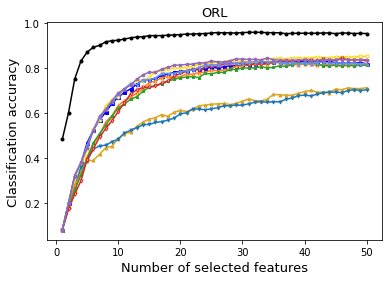

orlraws10P
Orlraws10P & 11 & 98.75


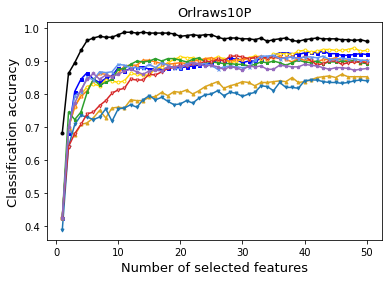

Pixraw10P
Pixraw10P & 13 & 99.50


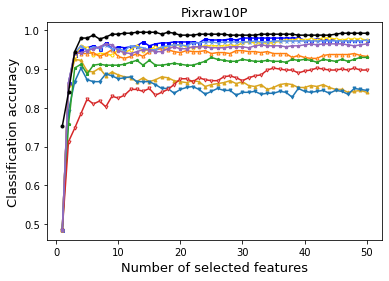

Prostate_GE
Prostate_GE & 21 & 93.66


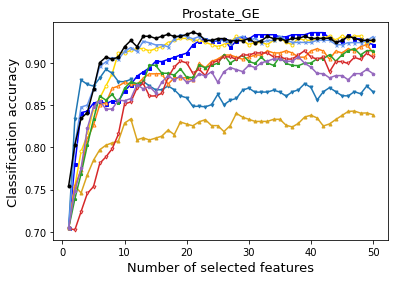

TOX_171
TOX_171 & 31 & 85.15


warpAR10P
WarpAR10P & 50 & 85.00


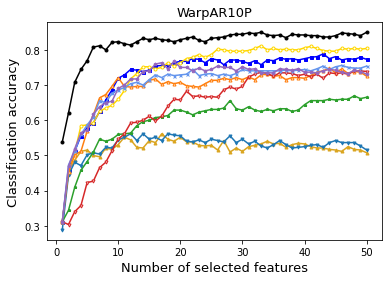

WarpPIE10P
WarpPIE10P & 33 & 95.24


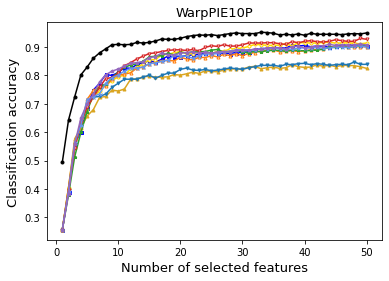

Yale
Yale & 49 & 74.56


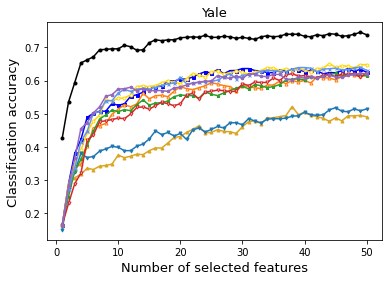

analcatdata_authorship
Authorship & 45 & 98.90


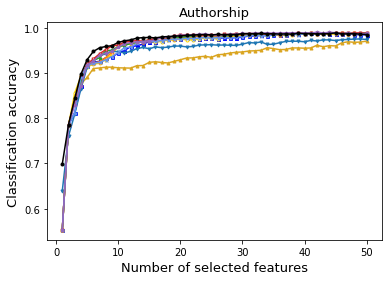

mfeat_factors
Factors & 47 & 95.57


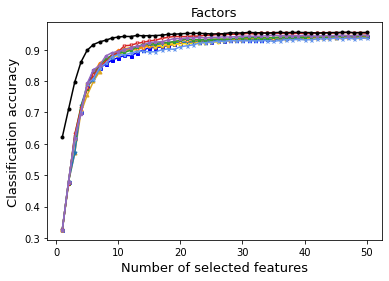

mfeat-pixel
Pixel & 50 & 94.75


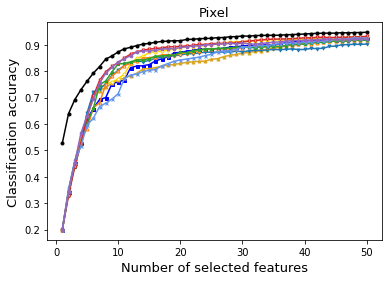

sorlie
Sorlie & 44 & 85.52


su
Su & 38 & 97.61


yeoh
Yeoh & 36 & 96.86


[29, 18, 27, 46, 41, 22, 11, 48, 41, 42, 49, 32, 11, 13, 21, 31, 50, 33, 49, 45, 47, 50, 44, 38, 36]


In [43]:
# print ()saf
FSTpye = ['mRMR50','CIFE50','JMIM50','IWFS50','MRI50','CFR50','DCFS50','MRMD50','UCRFS50','CSMRmRMC2_50_1']
NameTpye = ['mRMR','CIFE','JMIM','IWFS','MRI','CFR','DCSF','MRMD','UCRFS','CSMDCCMR']
# dataset = [
# 'WarpPIE10P']
# dataName = [
# 'WarpPIE10P']
dataset = [
'dermatology','featMIAS','movement_libras','musk1','Synthetic_control','waveform','wdbc' ,'arcene'
,'CLL_SUB_111' ,'GLIOMA','Isolet','ORL','orlraws10P' ,'Pixraw10P','Prostate_GE','TOX_171','warpAR10P','WarpPIE10P'
,'Yale','analcatdata_authorship','mfeat_factors','mfeat-pixel', 'sorlie','su','yeoh']
dataName = [
'Dermatology','FeatMIAS','Movement_libras','Musk1','Synthetic_control','Waveform','Wdbc'
,'Arcene','CLL_SUB_111' ,'GLIOMA','Isolet' ,'ORL','Orlraws10P','Pixraw10P','Prostate_GE','TOX_171','WarpAR10P','WarpPIE10P','Yale','Authorship'
,'Factors','Pixel', 'Sorlie','Su','Yeoh']

Classifier = ['nb','knn','C4.5','svm','ab','rf','bg','5nn','10nn']
claidx = [0,1,3,5]
for i in range(len(dataset)):
    test(FSTpye,dataset[i],dataName[i],Classifier,NameTpye,claidx)
print(maxx)
legend(NameTpye)

In [44]:
from shutil import copyfile, ignore_patterns
from glob import *
from os import system
# os.chdir('C:/Users/xuhao/Desktop/pyWorkSpace/single_FS')
Tpye = 'CSMRmRMC2'
# ()xdfas
# for i in range(4):
#     source = 'C:/Users/xuhao/Desktop/pyWorkSpace/fuzzy_FS/evaldata/'+dataset+'/'+dataset+'_'+Classifier[i]+'_acc.eps'
#     destination = 'C:/Users/xuhao/Desktop/fig/acc/' + FSTpye[7] + '/'+dataset+'_'+Classifier[i]+'_acc.eps'
#     copyfile(source, destination)
for i in range(len(dataset)):
    fileList = glob('./evaldata/'+dataset[i]+'/*.pdf')
    for f in fileList:
          system('pdftops -eps {0}'.format(f))
    source = './evaldata/'+dataset[i]+'/'+dataset[i]+'_all_acc.eps'
    destination = 'C:/Users/xuhao/Desktop/experiment/csFS3-2/cs2 - 1/'+Tpye+'_'+dataset[i]+'_all_acc.eps'
    # destination = 'C:/Users/xuhao/Desktop/fig/acc/' + FSTpye[7] + '/'+dataset+'_all_acc.png'
    copyfile(source, destination)
    print('\includegraphics[scale=0.5]{' +Tpye+'_'+dataset[i]+'_all_acc.eps}')

\includegraphics[scale=0.5]{CSMRmRMC2_dermatology_all_acc.eps}
\includegraphics[scale=0.5]{CSMRmRMC2_featMIAS_all_acc.eps}
\includegraphics[scale=0.5]{CSMRmRMC2_movement_libras_all_acc.eps}
\includegraphics[scale=0.5]{CSMRmRMC2_musk1_all_acc.eps}
\includegraphics[scale=0.5]{CSMRmRMC2_Synthetic_control_all_acc.eps}
\includegraphics[scale=0.5]{CSMRmRMC2_waveform_all_acc.eps}
\includegraphics[scale=0.5]{CSMRmRMC2_wdbc_all_acc.eps}
\includegraphics[scale=0.5]{CSMRmRMC2_arcene_all_acc.eps}
\includegraphics[scale=0.5]{CSMRmRMC2_CLL_SUB_111_all_acc.eps}
\includegraphics[scale=0.5]{CSMRmRMC2_GLIOMA_all_acc.eps}
\includegraphics[scale=0.5]{CSMRmRMC2_Isolet_all_acc.eps}
\includegraphics[scale=0.5]{CSMRmRMC2_ORL_all_acc.eps}
\includegraphics[scale=0.5]{CSMRmRMC2_orlraws10P_all_acc.eps}
\includegraphics[scale=0.5]{CSMRmRMC2_Pixraw10P_all_acc.eps}
\includegraphics[scale=0.5]{CSMRmRMC2_Prostate_GE_all_acc.eps}
\includegraphics[scale=0.5]{CSMRmRMC2_TOX_171_all_acc.eps}
\includegraphics[scale=0.5]{CSM

In [ ]:
print（）

In [9]:
from scipy import stats
import numpy as np
# dataset = ['Web' ,'synthetic_control','wdbc','GLIOMA','SRBCT','Lymphoma_2','Leukemia_3c','Leukemia_4c','chowdary'
#  ,'mfeat_factors','burczynski', 'orlraws10P','sonar','TOX_171','wine','Wpbc','qsar-biodeg','dermatology','tumors_C'
# ,'movement_libras','GLI-85','analcatdata_authorship', 'gravier','gordon','pomeroy', 'singh', 'sorlie', 'su','mfeat-pixel'
# ,'spectf','Prostate_GE','featMIAS','ALLAML','WarpPIE10P','Pixraw10P', 'tian'
# ,'west','musk1', 'semeion','waveform','colon','Yale','CLL_SUB_111','warpAR10P','arcene','Carcinom'
# , 'Isolet','yeoh','ORL','vehicle','calendarDOW','heart-statlog','HCCSurvivalData','onehr','satimage','analcatdata_halloffame'
# ,'parkinsons','messidor_features','Eucalyptus','australian','flags','segment','sick','dbworld_bodies','planning-relax','leukemia_0','optdigits']

# CSMRmRMC2
# dataset = [
# 'dermatology','featMIAS','movement_libras','musk1','Synthetic_control','waveform','wdbc' ,'arcene'
# ,'CLL_SUB_111' ,'GLIOMA','Isolet','ORL','orlraws10P' ,'Pixraw10P','Prostate_GE','TOX_171','warpAR10P','WarpPIE10P'
# ,'Yale','analcatdata_authorship','mfeat_factors','mfeat-pixel', 'sorlie','su','yeoh']
# dataName = [
# 'Dermatology','FeatMIAS','Movement_libras','Musk1','Synthetic_control','Waveform','Wdbc'
# ,'Arcene','CLL_SUB_111' ,'GLIOMA','Isolet' ,'ORL','Orlraws10P','Pixraw10P','Prostate_GE','TOX_171','WarpAR10P','WarpPIE10P','Yale','Authorship'
# ,'Factors','Pixel', 'Sorlie','Su','Yeoh']

#CSMRmRMC3
dataset = ['Dermatology','FeatMIAS','Flags','Ionosphere','Movement_libras','Synthetic_control','Waveform'
 ,'Isolet' ,'ORL','Orlraws10P','Pixraw10P','TOX_171','WarpAR10P','WarpPIE10P','Yale','analcatdata_authorship'
,'mfeat_factors','mfeat-pixel','SRBCT', 'Sorlie','Su', 'Tian']
dataName = ['Dermatology','FeatMIAS','Flags','Ionosphere','Movement_libras','Synthetic_control','Waveform'
 ,'Isolet' ,'ORL','Orlraws10P','Pixraw10P','TOX_171','WarpAR10P','WarpPIE10P','Yale','Authorship'
,'Factors','Pixel','Khan', 'Sorlie','Su', 'Tian']
# CSMRmRMC4
# dataset = ['dermatology','movement_libras','segment','semeion','synthetic_control','waveform','Web','Wpbc','arcene','Isolet','USPS'
#            ,'WarpPIE10P','analcatdata_authorship','mfeat_factors','mfeat-pixel']
# dataName = ['Dermatology','Movement_libras','Segment','Semeion','Synthetic_control','Waveform','Web','Wpbc','Arcene','Isolet','USPS'
#             ,'WarpPIE10P','Authorship','Factors','Pixel']
# dataset = ['spectf','movement_libras' ,'semeion','synthetic_control','web','Wpbc','Isolet'
#            ,'orlraws10P','USPS','WarpAR10P','WarpPIE10P','Yale','analcatdata_authorship'
#             ,'mfeat_factors', 'mfeat-pixel' ]
# dataName = ['Spectf','Movement_libras' ,'Semeion','Synthetic_control','Web','Wpbc','Isolet'
#             ,'Orlraws10P','USPS','WarpAR10P','WarpPIE10P','Yale','Authorship'
#             ,'Factors','Pixel' ] 
# dataset = ['dermatology']
# dataName = dataset
# FSTpye = ['mRMR50','CIFE50','JMIM50','IWFS50','MRI50','CFR50','DCFS50','MRMD50','UCRFS50','CSMRmRMC2_50_1']
FSTpye = ['IWFS50','JMIM50','MRI50','DCFS50','UCRFS50','RAIW50','LBRC50','CWJR-FS50','MRMSR50','CSMRmRMC5_1']

Classifier = ['nb','knn','C4.5','svm','ab','rf','bg','5nn','10nn']
claidx = [0,1,2,3,4,5,6,7,8]
TpyeCount = len(FSTpye)
claCount = len(Classifier)
dateCount = len(dataset)
nfea = np.zeros(dateCount)
bd = np.zeros(dateCount)
ACC ={}

for i in range(dateCount):
    claCount = len(Classifier)
#     print(dataset[i])
    file = './evaldata/'+dataset[i]
    idx_file = file+'/' + FSTpye[0] + '/' + 'ACC.bat'
    acc_temp = np.fromfile(file=idx_file, dtype=np.float64)
#     print(len(acc_temp),claCount)
#     if (len(acc_temp)/10)%claCount != 0:
#         claCount = 7
    acc_temp = acc_temp.reshape(claCount, 10,-1)
    lc,lt,nfea = acc_temp.shape
    ACC[i] = np.zeros((9,TpyeCount, 10, nfea))
    for j in range(TpyeCount):
        claCount = len(Classifier)
        file = './evaldata/'+dataset[i]
        idx_file = file+'/' + FSTpye[j] + '/' + 'ACC.bat'
#         print(FSTpye[j],dataset[i])
        acc_temp = np.fromfile(file=idx_file, dtype=np.float64)
#         if (len(acc_temp)/10)%claCount != 0:
#             claCount = 7
        acc_temp = acc_temp.reshape(claCount, 10,-1)

        lc,lt,nfea = acc_temp.shape
        ACC[i][0:claCount,j,:,:] = acc_temp

        
    
for i in claidx:
    
    print(Classifier[i])
    bestdata = []
    win=np.zeros(TpyeCount)
    lose = np.zeros(TpyeCount)
    equal = np.zeros(TpyeCount)
    for j in range(dateCount):
        clacc = ACC[j][i,:,:,:]
        
        mean = np.zeros(TpyeCount)
        mean = np.mean(np.mean(clacc,axis=1),axis=1)*100
        std = np.zeros(TpyeCount)
        std = np.std(np.std(clacc,axis=1),axis=1)*100
        
        ####t-test
        pvalue= np.zeros(TpyeCount-1)
        for z in range(TpyeCount-1):
            if list(clacc[TpyeCount-1,:,:].ravel())==list(clacc[z,:,:].ravel()):
                pvalue[z] = 1
            else:
                tstatistic,pvalue[z]= stats.wilcoxon(clacc[TpyeCount-1,:,:].ravel(),clacc[z,:,:].ravel(),alternative='two-sided')
        symbol = {}
        best = True
        for z in range(TpyeCount-1):
            if mean[z]>mean[TpyeCount-1]:
                best = False
            if pvalue[z] >0.05:
                equal[z] = equal[z] + 1
                symbol[z]='='
            elif mean[z]>mean[TpyeCount-1]:
                lose[z] = lose[z] + 1
                symbol[z]='-'
            else:
                win[z] = win[z] + 1
                symbol[z]='+'
                
            
        if best == True:
            bestdata.append(dataset[j])
            bd[j] = bd[j]+1
#         print(symbol)
        print('%s & %.2f & %.2f($%s$) & %.2f & %.2f($%s$) & %.2f & %.2f($%s$) & %.2f & %.2f($%s$) & %.2f & %.2f($%s$) & %.2f & %.2f($%s$) & %.2f & %.2f($%s$) & %.2f & %.2f($%s$) & %.2f & %.2f($%s$) & %.2f & %.2f'%(
            dataName[j],mean[0],std[0],symbol[0],mean[1],std[1],symbol[1],mean[2],std[2],symbol[2],mean[3],std[3],symbol[3]
            ,mean[4],std[4],symbol[4],mean[5],std[5],symbol[5],mean[6],std[6],symbol[6],mean[7],std[7],symbol[7],mean[8],std[8],symbol[8],
            mean[9],std[9]))
    print(bestdata)
    print('W/T/L & %d/%d/%d& & %d/%d/%d& & %d/%d/%d& & %d/%d/%d& & %d/%d/%d& & %d/%d/%d & & %d/%d/%d & & %d/%d/%d & & %d/%d/%d'%(win[0],equal[0],lose[0],
              win[1],equal[1],lose[1],win[2],equal[2],lose[2],win[3],equal[3],lose[3],win[4],equal[4],lose[4],win[5],equal[5],lose[5],
             win[6],equal[6],lose[6],win[7],equal[7],lose[7],win[8],equal[8],lose[8]
              ))
    print('max#######################################')
#     for j in range(dateCount):
#         clacc = ACC[j][i,:,:,:]
#         maxx = np.zeros(TpyeCount)
#         maxx = np.max(np.mean(clacc, axis=1)*100,axis=1)
#         print('%s & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f'%(
#             dataset[j],maxx[0],maxx[1],maxx[2],maxx[3],maxx[4],maxx[5],maxx[6],maxx[7],maxx[8],maxx[TpyeCount-DTYPE]))
for i in range(dateCount):
    print(dataset[i],bd[i])  
# Waveform Arcene USPS 

nb
Dermatology & 82.67 & 0.73($+$) & 83.29 & 0.75($=$) & 83.13 & 1.02($=$) & 81.72 & 1.07($+$) & 82.98 & 1.27($=$) & 82.87 & 1.35($=$) & 83.25 & 0.73($=$) & 83.06 & 0.49($=$) & 82.06 & 0.72($+$) & 83.65 & 1.75
FeatMIAS & 66.79 & 1.02($+$) & 66.78 & 1.04($+$) & 66.45 & 0.84($+$) & 69.53 & 1.03($=$) & 70.77 & 1.03($-$) & 68.91 & 0.97($=$) & 67.46 & 1.30($+$) & 66.34 & 0.88($+$) & 65.61 & 0.84($+$) & 69.41 & 0.79
Flags & 48.56 & 1.65($-$) & 46.13 & 2.45($+$) & 49.56 & 2.00($-$) & 47.68 & 1.89($=$) & 48.72 & 1.75($-$) & 44.69 & 2.42($+$) & 49.59 & 2.16($-$) & 39.52 & 1.78($+$) & 47.40 & 2.44($=$) & 47.37 & 3.11
Ionosphere & 88.32 & 0.63($+$) & 84.27 & 1.13($+$) & 81.48 & 1.27($+$) & 87.70 & 0.55($+$) & 80.28 & 0.68($+$) & 88.95 & 0.34($=$) & 82.66 & 1.27($+$) & 85.75 & 2.16($+$) & 86.54 & 1.29($+$) & 89.00 & 0.60
Movement_libras & 51.93 & 1.13($+$) & 58.00 & 0.89($+$) & 58.67 & 1.13($+$) & 59.17 & 1.13($=$) & 60.15 & 0.85($=$) & 57.92 & 1.21($+$) & 59.44 & 0.92($=$) & 58.27 & 1.05($+$) & 4

Yale & 32.82 & 1.31($+$) & 41.84 & 2.56($+$) & 42.20 & 1.81($+$) & 40.41 & 2.09($+$) & 47.24 & 2.69($+$) & 45.82 & 1.72($+$) & 42.33 & 2.46($+$) & 44.06 & 2.18($+$) & 48.12 & 2.21($+$) & 69.10 & 1.58
Authorship & 91.07 & 0.51($+$) & 92.69 & 0.49($+$) & 92.68 & 0.55($+$) & 92.95 & 0.54($+$) & 92.65 & 0.57($+$) & 92.76 & 0.56($+$) & 93.10 & 0.60($+$) & 92.66 & 0.52($+$) & 92.69 & 0.59($+$) & 95.03 & 0.46
Factors & 84.03 & 0.47($+$) & 85.24 & 0.44($+$) & 85.88 & 0.50($+$) & 85.67 & 0.46($+$) & 85.81 & 0.40($+$) & 86.06 & 0.32($+$) & 84.98 & 0.45($+$) & 86.03 & 0.60($+$) & 83.24 & 0.39($+$) & 94.62 & 0.29
Pixel & 79.39 & 0.67($+$) & 81.47 & 0.91($+$) & 79.02 & 0.77($+$) & 81.13 & 0.75($+$) & 81.01 & 0.70($+$) & 79.63 & 0.85($+$) & 82.11 & 0.59($+$) & 80.61 & 1.08($+$) & 74.38 & 0.73($+$) & 92.92 & 0.42
Khan & 79.63 & 1.95($+$) & 76.67 & 2.29($+$) & 71.06 & 2.86($+$) & 67.75 & 1.98($+$) & 79.27 & 1.93($+$) & 85.17 & 2.52($=$) & 73.92 & 2.89($+$) & 80.52 & 3.61($+$) & 79.09 & 2.02($+$) & 85.

Su & 84.52 & 1.74($+$) & 86.09 & 2.18($+$) & 83.16 & 2.41($+$) & 77.93 & 2.57($+$) & 85.32 & 1.52($+$) & 87.85 & 1.53($+$) & 84.86 & 1.89($+$) & 81.37 & 2.35($+$) & 86.45 & 2.22($+$) & 90.33 & 1.80
Tian & 71.69 & 1.73($+$) & 73.62 & 1.60($+$) & 71.36 & 2.24($+$) & 72.69 & 2.10($+$) & 73.43 & 1.82($+$) & 74.02 & 1.82($+$) & 75.78 & 2.09($+$) & 73.14 & 2.45($+$) & 73.77 & 1.76($+$) & 78.81 & 1.38
['Dermatology', 'FeatMIAS', 'Flags', 'Movement_libras', 'Synthetic_control', 'Waveform', 'Isolet', 'ORL', 'Orlraws10P', 'Pixraw10P', 'WarpAR10P', 'WarpPIE10P', 'Yale', 'analcatdata_authorship', 'mfeat_factors', 'mfeat-pixel', 'SRBCT', 'Sorlie', 'Su', 'Tian']
W/T/L & 21/0/1& & 22/0/0& & 22/0/0& & 21/1/0& & 22/0/0& & 20/2/0 & & 21/1/0 & & 22/0/0 & & 21/1/0
max#######################################
rf
Dermatology & 91.76 & 0.95($+$) & 91.68 & 0.82($+$) & 92.12 & 0.91($+$) & 91.82 & 1.09($+$) & 92.20 & 0.90($+$) & 92.17 & 0.55($+$) & 93.11 & 0.84($+$) & 90.33 & 0.61($+$) & 88.65 & 1.32($+$) & 95.90

Synthetic_control & 85.65 & 0.85($+$) & 83.63 & 1.53($+$) & 90.27 & 0.91($+$) & 89.78 & 0.73($+$) & 90.30 & 0.74($+$) & 89.55 & 0.70($+$) & 91.82 & 0.81($+$) & 90.68 & 0.84($+$) & 84.56 & 1.26($+$) & 92.65 & 0.67
Waveform & 74.26 & 0.57($+$) & 77.32 & 0.62($+$) & 77.50 & 0.62($+$) & 76.56 & 0.65($+$) & 75.69 & 0.66($+$) & 77.61 & 0.73($+$) & 77.27 & 0.60($+$) & 70.91 & 0.65($+$) & 77.72 & 0.64($+$) & 79.37 & 0.42
Isolet & 52.46 & 0.87($+$) & 59.22 & 0.84($+$) & 66.13 & 0.75($+$) & 69.31 & 0.74($+$) & 68.79 & 0.74($+$) & 68.29 & 0.68($+$) & 66.90 & 0.92($+$) & 66.81 & 0.74($+$) & 55.51 & 0.72($+$) & 79.84 & 0.57
ORL & 50.48 & 1.67($+$) & 71.18 & 1.46($+$) & 67.44 & 1.46($+$) & 68.58 & 1.29($+$) & 69.66 & 1.21($+$) & 66.47 & 1.22($+$) & 71.48 & 1.62($+$) & 69.77 & 1.28($+$) & 69.06 & 1.18($+$) & 91.68 & 0.94
Orlraws10P & 66.56 & 2.47($+$) & 87.54 & 2.19($+$) & 84.82 & 1.84($+$) & 78.24 & 2.80($+$) & 88.46 & 1.64($+$) & 80.56 & 2.66($+$) & 86.60 & 1.64($+$) & 85.94 & 1.75($+$) & 86.10 & 1

In [10]:
claIdx = [7,3,4,6]
# claIdx = [2,3,4,5]

TpyeCount = len(FSTpye)
claCount = len(Classifier)
dateCount = len(dataset)

y={}
s = []
for i in range(dateCount):
    for j in range(TpyeCount):
        y[j]=0
        acc = []
        for k in claIdx:
            clacc = ACC[i][k,j,:,:]
#             if np.max(np.mean(clacc, axis=0)*100) > y[j]:
#                 y[j] = np.max(np.mean(clacc, axis=0)*100)
            y[j] += np.max(np.mean(clacc, axis=0)*100)
            acc.append(np.max(np.mean(clacc, axis=0)))
        std[j] = np.std(acc)*100
    for j in range(TpyeCount):
        y[j] = y[j]/4
#     print(std)
#     print('%s & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f'%(
#             dataName[i],y[0],y[1],y[2],y[3],y[4]
#             ,y[5],y[6],y[7],y[8],y[TpyeCount-1]))
    print('%s & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f & %.2f'%(
            dataName[i],y[0],std[0],y[1],std[1],y[2],std[2],y[3],std[3],y[4],std[4]
            ,y[5],std[5],y[6],std[6],y[7],std[7],y[8],std[8],y[TpyeCount-1],std[TpyeCount-1]))
    flag = 0
    for j in range(TpyeCount-1):
        if y[j]>y[TpyeCount-1]:  
            flag = 1
    if flag == 1:
        s.append(0)
    else:
        s.append(dataset[i])
print(s)
# 

Dermatology & 96.60 & 0.87 & 96.60 & 1.05 & 96.87 & 0.88 & 96.73 & 0.82 & 96.46 & 0.82 & 97.41 & 0.41 & 96.87 & 0.72 & 97.95 & 0.57 & 97.14 & 0.64 & 96.93 & 0.80
FeatMIAS & 69.38 & 3.24 & 72.39 & 2.21 & 72.26 & 2.69 & 71.80 & 3.04 & 72.64 & 3.00 & 72.48 & 3.24 & 70.61 & 2.40 & 71.38 & 2.91 & 70.83 & 2.11 & 74.48 & 1.97
Flags & 71.92 & 0.87 & 73.01 & 1.53 & 70.93 & 0.87 & 69.45 & 1.63 & 71.18 & 1.30 & 73.27 & 1.46 & 72.89 & 1.59 & 70.80 & 1.98 & 73.03 & 1.52 & 74.19 & 1.53
Ionosphere & 93.87 & 1.57 & 93.59 & 1.77 & 92.95 & 2.44 & 93.59 & 2.10 & 93.02 & 2.47 & 93.52 & 1.92 & 92.88 & 2.33 & 91.87 & 1.24 & 93.59 & 2.29 & 93.66 & 1.45
Movement_libras & 78.12 & 3.77 & 79.31 & 3.94 & 80.21 & 2.53 & 80.49 & 3.29 & 78.54 & 4.47 & 79.17 & 3.39 & 80.07 & 3.89 & 79.38 & 4.11 & 75.83 & 3.41 & 84.03 & 2.53
Synthetic_control & 93.38 & 2.84 & 95.46 & 2.44 & 95.83 & 2.68 & 95.33 & 2.34 & 95.33 & 2.08 & 94.50 & 2.18 & 95.54 & 2.65 & 95.75 & 2.70 & 95.38 & 2.49 & 97.42 & 0.95
Waveform & 79.26 & 2.52 & 81

In [33]:
from loadData import *
import os
########################手动操作########################
dataset = ['Dermatology','FeatMIAS','Flags','Ionosphere','Movement_libras','Synthetic_control','Waveform'
 ,'Isolet' ,'ORL','Orlraws10P','Pixraw10P','TOX_171','WarpAR10P','WarpPIE10P','Yale','analcatdata_authorship'
,'mfeat_factors','mfeat-pixel','SRBCT', 'Sorlie','Su', 'Tian']
dataName = ['Dermatology','FeatMIAS','Flags','Ionosphere','Movement\_libras','Synthetic\_control','Waveform'
 ,'Isolet' ,'ORL','Orlraws10P','Pixraw10P','TOX\_171','WarpAR10P','WarpPIE10P','Yale','Authorship'
,'Factors','Pixel','Khan', 'Sorlie','Su', 'Tian']
# Sources = ['UCI','UCI','UCI','UCI','UCI','UCI','UCI','UCI','FSD','FSD','FSD','FSD','PMLB','PMLB','PMLB']
# os.chdir('C:/Users/xuhao/Desktop/pyWorkSpace/single_FS/')
#########################预处理############################
# 加载数据
for i in range(len(dataset)):
    path = '../fuzzy_FS/data/'+dataset[i]+'.arff'
    sample, label, isb, meta = loadDataArff(path)

    n_s,n_f = sample.shape
    num = len(np.unique(label))
    print(i+1,' &',dataName[i],'&',n_s,'&',n_f,'&',num,'& UCI', '\\\\')

1  & Dermatology & 366 & 34 & 6 & UCI \\
2  & FeatMIAS & 322 & 280 & 4 & UCI \\
3  & Flags & 194 & 28 & 6 & UCI \\
4  & Ionosphere & 351 & 34 & 2 & UCI \\
5  & Movement\_libras & 360 & 90 & 15 & UCI \\
6  & Synthetic\_control & 600 & 60 & 6 & UCI \\
7  & Waveform & 5000 & 40 & 3 & UCI \\
8  & Isolet & 1560 & 617 & 26 & UCI \\
9  & ORL & 400 & 1024 & 40 & UCI \\
10  & Orlraws10P & 100 & 10304 & 10 & UCI \\
11  & Pixraw10P & 100 & 10000 & 10 & UCI \\
12  & TOX\_171 & 171 & 5748 & 4 & UCI \\
13  & WarpAR10P & 130 & 2400 & 10 & UCI \\
14  & WarpPIE10P & 210 & 2420 & 10 & UCI \\
15  & Yale & 165 & 1024 & 15 & UCI \\
16  & Authorship & 841 & 70 & 4 & UCI \\
17  & Factors & 2000 & 216 & 10 & UCI \\
18  & Pixel & 2000 & 240 & 10 & UCI \\
19  & Khan & 83 & 2308 & 4 & UCI \\
20  & Sorlie & 84 & 456 & 5 & UCI \\
21  & Su & 101 & 5565 & 4 & UCI \\
22  & Tian & 172 & 12625 & 2 & UCI \\


In [ ]:
from loadData import *
from decimal import Decimal,ROUND_HALF_UP
def smart_round(x,n):
    return str(Decimal(x).quantize(Decimal("0."+"0"*n),rounding=ROUND_HALF_UP))

# FSTpye = ['MRMR','CIFE','JMIM','IWFS','MRI','CFR','DCFS','MRMD','UCRFS','CSMRmRMC2']
#CSMRmRMC2
dataset = ['dermatology','musk1','semeion','synthetic_control', 'waveform','web','arcene','Isolet'
           ,'USPS','warpAR10P','WarpPIE10P','Yale','analcatdata_authorship','mfeat_factors','mfeat-pixel']
dataName = ['Dermatology','Musk1','Semeion','Synthetic\_control','Waveform' ,'Web','Arcene','Isolet'
            ,'USPS','WarpAR10P','WarpPIE10P','Yale' ,'Authorship','Factors','Pixel']
# dataset = ['musk1','semeion','synthetic_control', 'waveform','web','Wpbc','Isolet','orlraws10P'
#            ,'USPS','warpAR10P','WarpPIE10P','Yale','analcatdata_authorship','mfeat_factors','mfeat-pixel']
# dataName = ['Musk1','Semeion','Synthetic\_control','Waveform' ,'Web','Wpbc','Isolet','Orlraws10P'
#             ,'USPS','WarpAR10P','WarpPIE10P','Yale' ,'Authorship','Factors','Pixel']

# dataset = ['dermatology','movement_libras','segment','semeion','synthetic_control','waveform','Web','Wpbc','arcene','Isolet','USPS'
#            ,'WarpPIE10P','analcatdata_authorship','mfeat_factors','mfeat-pixel']
# dataName = ['Dermatology','Movement\_libras','Segment','Semeion','Synthetic\_control','Waveform','Web','Wpbc','Arcene','Isolet','USPS'
#             ,'WarpPIE10P','Authorship','Factors','Pixel']

# dataset = ['dermatology','musk1','semeion','synthetic_control', 'waveform','web','arcene','Isolet'
#            ,'USPS','warpAR10P','WarpPIE10P','Yale','analcatdata_authorship','mfeat_factors','mfeat-pixel']
# dataName = ['Dermatology','Musk1','Semeion','Synthetic\_control','Waveform' ,'Web','Arcene','Isolet'
#             ,'USPS','WarpAR10P','WarpPIE10P','Yale' ,'Authorship','Factors','Pixel']
# Classifier = ['nb','knn','C4.5','svm','ab']
claIdx = [0,1,2,3]
claCount = len(Classifier)
FSCount = len(FSTpye)
for i in range(len(dataset)):
#     print(dataset[i])
    file = './evaldata/'+dataset[i]
    path = '../fuzzy_FS/data/'+dataset[i]+'.arff'

    sample,label,labelCount,meta = loadDataArff(path)
    nfea = sample.shape[1]
#     print(FSCount,nfea,labelCount)
    if nfea > 30:
        nfea = 30
    csACC = np.zeros((claCount,FSCount, 10, nfea,labelCount))
    ACC = np.zeros((claCount,FSCount, 10, nfea))

    #################csACC
    for j in range(FSCount):
        csidx_file = file+'/' + FSTpye[j] + '/' + 'csACC.bat'
        csACC[:,j,:,:,:] = np.fromfile(file=csidx_file, dtype=np.float64).reshape(claCount, 10, nfea,labelCount)
        idx_file = file+'/' + FSTpye[j] + '/' + 'ACC.bat'
        ACC[:,j,:,:] = np.fromfile(file=idx_file, dtype=np.float64).reshape(claCount, 10, nfea)
    csmean=np.zeros((claCount,labelCount,FSCount))
    mean=np.zeros((claCount,FSCount))

    for c in range(claCount):
        for j in range(len(FSTpye)):
            csacc = csACC[c,j,:,:,:]
            acc = ACC[c,j,:,:]
            csmean[c,:,j] = np.mean(np.mean(csacc,axis=0),axis=0)*100
            mean[c,j] = np.mean(np.mean(acc,axis=0),axis=0)*100
#         print(Classifier[c])
#         for j in range(labelCount):
#             print('%d %.2f %.2f %.2f %.2f %.2f %.2f %.2f %.2f %.2f %.2f'%(j+1,
#             csmean[c,j,0],csmean[c,j,1],csmean[c,j,2],csmean[c,j,3],csmean[c,j,4],csmean[c,j,5],csmean[c,j,6],csmean[c,j,7],csmean[c,j,8],csmean[c,j,9]))
#         print('Average %.2f %.2f %.2f %.2f %.2f %.2f %.2f %.2f %.2f %.2f'%(
#             mean[c,0],mean[c,1],mean[c,2],mean[c,3],mean[c,4],mean[c,5],mean[c,6],mean[c,7],mean[c,8],mean[c,9]))
    print(' ')
    print('\\begin{table}[!h] \\footnotesize')
    print( '\\caption{The class-specific accuracies (\\%) of four classifiers with ten methods on datasets '+dataName[i]+'} \\label{max}')
    print( '\\begin{center}')
    print('\\begin{tabular}{lllllllllll}')
    print( '\\hline')
    print( 'Classes & mRMR & CIFE & JMIM & IWFS & MRI & CFR & DCFS & MRMD & UCRFS & '+NameTpye[-1] + '\\\\')
    print( '\\hline')
    y1 = np.zeros((labelCount,FSCount))
    y2 = np.zeros(FSCount)
    for i in claIdx:
        y1 += csmean[i,:,:]
        y2 += mean[i,:]
    y1 = y1/len(claIdx)
    y2 = y2/len(claIdx)
    
    idx1 = np.argmax(y1,axis=1)
    idx2 = np.argmax(y2)
    
    for j in range(labelCount):
        y = ['' for k in range(FSCount)]
        for k in range(FSCount):
            y[k]=str(smart_round(y1[j,k],2))
            if k == idx1[j]:
                y[k] = '\\textbf{'+str(smart_round(y1[j,k],2))+'}'
        print('%d & %s & %s & %s & %s & %s & %s & %s & %s & %s & %s \\\\'%(j+1,
            y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9]))
    y = ['' for k in range(FSCount)]
    for k in range(FSCount):
        y[k]=str(smart_round(y2[k],2))
        if k == idx2:
            y[k] = '\\textbf{'+str(smart_round(y2[k],2))+'}'
    print('Average & %s & %s & %s & %s & %s & %s & %s & %s & %s & %s \\\\'%(
            y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9]))
    print( '\\hline')
    print( '\\end{tabular}')
    print( '\\end{center}')
    print( '\\end{table}' )


In [8]:
import numpy as np
mean = [79.92,85.13,83.90,83.66,84.84,84.80,85.12,85.06,84.25,90.01
]


l = len(mean)
rate = np.zeros(l)
diff = np.zeros(l)

FSCount = l
for i in range(FSCount-1):
    rate[i] = (mean[-1]-mean[i])/mean[i]*100
print('%.2f\\%%, %.2f\\%%, %.2f\\%%, %.2f\\%%, %.2f\\%%, %.2f\\%%, %.2f\\%%, %.2f\\%%, and %.2f\\%%'%(rate[0],rate[1],rate[2],rate[3],rate[4],rate[5],rate[6],rate[7],rate[8]))

for i in range(FSCount-1):
    diff[i] = (mean[-1]-mean[i])
print('%.2f\\%%, %.2f\\%%, %.2f\\%%, %.2f\\%%, %.2f\\%%, %.2f\\%%, %.2f\\%%, %.2f\\%%, and %.2f\\%%'%(diff[0],diff[1],diff[2],diff[3],diff[4],diff[5],diff[6],diff[7],diff[8]))

12.63\%, 5.73\%, 7.28\%, 7.59\%, 6.09\%, 6.14\%, 5.74\%, 5.82\%, and 6.84\%
10.09\%, 4.88\%, 6.11\%, 6.35\%, 5.17\%, 5.21\%, 4.89\%, 4.95\%, and 5.76\%


In [23]:
import numpy as np
mean = [82.42,84.80,64.47,79.58,74.55,77.42,89.35
]


l = len(mean)
rate = np.zeros(l)
diff = np.zeros(l)

FSCount = l
for i in range(FSCount-1):
    rate[i] = (mean[-1]-mean[i])/mean[i]*100
print('%.2f\\%%, %.2f\\%%, %.2f\\%%, %.2f\\%%, %.2f\\%% , and %.2f\\%%'%(rate[0],rate[1],rate[2],rate[3],rate[4],rate[5]))

for i in range(FSCount-1):
    diff[i] = (mean[-1]-mean[i])
print('%.2f\\%%, %.2f\\%%, %.2f\\%%, %.2f\\%%, %.2f\\%% , and %.2f\\%%'%(diff[0],diff[1],diff[2],diff[3],diff[4],diff[5]))

8.41\%, 5.37\%, 38.59\%, 12.28\%, 19.85\% , and 15.41\%
6.93\%, 4.55\%, 24.88\%, 9.77\%, 14.80\% , and 11.93\%


In [1]:
from glob import *
from os import system
fileList = glob('C:/Users/xuhao/Desktop/experiment/sy/*.pdf')
# fileList = glob('E:/experiment/sy/*.pdf')
print(fileList)
for f in fileList:
    system('pdftops -eps {0}'.format(f))

['C:/Users/xuhao/Desktop/experiment/sy\\classSpecificFS.pdf', 'C:/Users/xuhao/Desktop/experiment/sy\\cs3.pdf', 'C:/Users/xuhao/Desktop/experiment/sy\\cs3_1.pdf', 'C:/Users/xuhao/Desktop/experiment/sy\\CSFFSG.pdf', 'C:/Users/xuhao/Desktop/experiment/sy\\CSFFSG_MDL_1.pdf', 'C:/Users/xuhao/Desktop/experiment/sy\\CSFIMFS.pdf', 'C:/Users/xuhao/Desktop/experiment/sy\\CSFIMFS_f1.pdf', 'C:/Users/xuhao/Desktop/experiment/sy\\CSFITFS_f1.pdf', 'C:/Users/xuhao/Desktop/experiment/sy\\CSMDCCMR.pdf', 'C:/Users/xuhao/Desktop/experiment/sy\\FDIWFS.pdf', 'C:/Users/xuhao/Desktop/experiment/sy\\framework.pdf', 'C:/Users/xuhao/Desktop/experiment/sy\\framework1.pdf', 'C:/Users/xuhao/Desktop/experiment/sy\\framework3.pdf', 'C:/Users/xuhao/Desktop/experiment/sy\\framework4.pdf', 'C:/Users/xuhao/Desktop/experiment/sy\\framework5.pdf', 'C:/Users/xuhao/Desktop/experiment/sy\\framework7.pdf', 'C:/Users/xuhao/Desktop/experiment/sy\\interaction.pdf', 'C:/Users/xuhao/Desktop/experiment/sy\\legend.pdf', 'C:/Users/xuh

In [21]:
import numpy as np
dataset = [
'dermatology','featMIAS','movement_libras','musk1','Synthetic_control','waveform','wdbc' ,'arcene'
,'CLL_SUB_111' ,'GLIOMA','Isolet','ORL','orlraws10P' ,'Pixraw10P','Prostate_GE','TOX_171','warpAR10P','WarpPIE10P'
,'Yale','analcatdata_authorship','mfeat_factors','mfeat-pixel', 'sorlie','su','yeoh']
dataName = [
'Dermatology','FeatMIAS','Movement_libras','Musk1','Synthetic_control','Waveform','Wdbc'
,'Arcene','CLL_SUB_111' ,'GLIOMA','Isolet' ,'ORL','Orlraws10P','Pixraw10P','Prostate_GE','TOX_171','WarpAR10P','WarpPIE10P','Yale','Authorship'
,'Factors','Pixel', 'Sorlie','Su','Yeoh']
FSTpye = ['CS_CFS_BF','CS_CFS_GEN','CS_CON_BF','CS_CON_GEN','POSCSR','MICSR',#0-8
        ]
FSName = ['CS-CFS-BF','CS-CFS-GEN','CS-CON-BF','CS-CON-GEN','POS-CSR','MI-CSR',#0-8
        ]
for i in range(len(dataset)):
#     print(dataset[i])
    le = np.zeros(len(FSTpye))
    for k in range(len(FSTpye)):
        times = 0
        file = './evaldata/'+dataset[i]
        path = file + '/' + FSTpye[k]
        idx_file = path + '/idx_time' + str(times) + '.npy'
        idxd = np.load(idx_file,allow_pickle=True)
        csidx = idxd.ravel()[0]
        l = 0
        for j in range(len(csidx)):
            l = l+len(csidx[j])
#         print(FSName[k],l/len(csidx))
        le[k] = l/len(csidx)
    print('%s %.2f %.2f %.2f %.2f %.2f %.2f'%(
        dataName[i],le[0],le[1],le[2],le[3],le[4],le[5]))

Dermatology 10.17 13.83 4.83 10.00 3.83 4.67
FeatMIAS 11.75 118.75 8.00 43.00 6.75 7.00
Movement_libras 8.93 35.87 6.13 12.33 5.40 5.27
Musk1 15.00 50.00 12.00 31.00 10.00 9.50
Synthetic_control 11.50 28.17 7.00 11.50 6.33 6.17
Waveform 9.33 15.33 14.00 15.00 13.00 13.67
Wdbc 11.00 10.00 12.00 12.00 10.00 11.50
Arcene 52.00 3977.00 7.00 1147.00 7.00 5.50
CLL_SUB_111 73.67 3710.33 4.00 272.00 3.33 3.67
GLIOMA 28.50 1663.00 3.50 157.00 2.00 2.50
Isolet 28.50 279.35 6.27 81.00 6.19 5.31
ORL 63.05 375.05 3.75 81.00 3.55 2.75
Orlraws10P 82.60 3366.60 2.70 50.00 1.80 1.70
Pixraw10P 43.00 3888.90 2.40 1147.00 1.40 1.40
Prostate_GE 20.00 2676.00 5.00 404.00 4.00 3.50
TOX_171 43.50 2087.50 5.50 269.00 4.50 4.25
WarpAR10P 20.70 1017.00 3.60 126.00 3.10 2.70
WarpPIE10P 19.70 682.90 4.20 221.00 3.80 4.50
Yale 24.67 333.80 3.93 81.00 3.87 2.93
Authorship 25.25 38.50 7.25 16.00 7.50 7.00
Factors 19.90 95.30 7.90 18.40 7.20 6.50
Pixel 23.60 100.10 8.20 17.00 8.70 7.20
Sorlie 21.20 142.40 3.80 21.00 3